Gradiente Descendente (em batch)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
class AdalineGD(object): #adaline gradienst descent
    """Adaptive Linear Neuron Classifier

    Parameters
    ----------
    eta: float
        Learning rate (between 0.0 and 1.0)
    n_iter: int
        Passes over the training dataset
    random_state: int
        Random number generator seed for random weight initialization

    Attributes
    ----------
    w_: 1d-array
        Weights after fitting.
    cost_: list
        Sum-of-squares cost function value in each epoch

    """

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit Training data.


        Parameters
        ----------
        X: {array-like}, shape = [n_exemples, n_features]
            Training vectors, where n_examples is the number of examples and n_features is the number of features.
        y: array-like, shape = [n_examples]
            Target values.

        Returns
        -------
        self: object    
            
        """

        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])

        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        
        return self
    

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """Compute linear activation"""
        return X
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1 )
    
    


In [24]:
#importando dados
df = pd.read_csv('Iris.csv', encoding='utf-8').drop('Id', axis=1)

#vamos utilizar apenas os atributos de comprimento da sépala e comprimento da pétala
X = df.iloc[:100, [0, 2]].values

#capturando setosa e verisculosa. setosa = -1; versiculosa = 1
y = df.iloc[:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

Plotagem dos erros ao longo das épocas do treinamento

Text(0.5, 1.0, 'Adaline - Learning rate 0.0001')

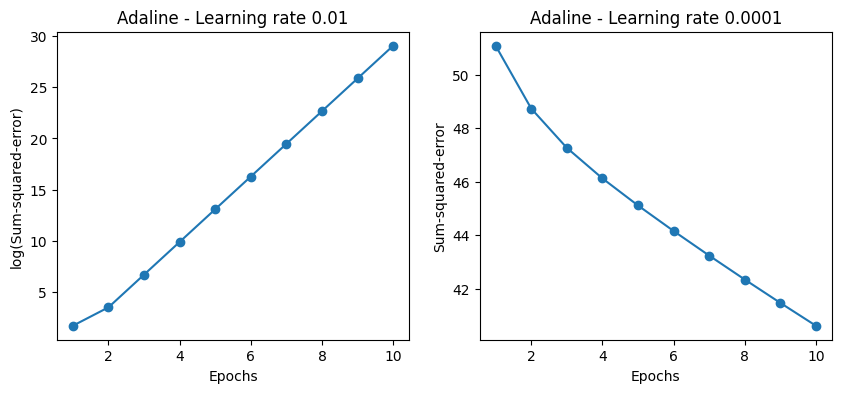

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)

ax[0].plot(np.array(range(1, len(ada1.cost_)+1)), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)

ax[1].plot( np.array(range(1, len(ada2.cost_)+1)), ada2.cost_, marker='o' )
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

Padronização das features - Modificando a escala (Feature Scaling Standardization)

In [36]:
X_std = np.copy(X)
X_std[:,0] = ( X[:, 0] - X[:, 0].mean() ) / X[:, 0].std()
X_std[:,1] = ( X[:, 1] - X[:, 1].mean() ) / X[:, 1].std()

In [37]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):

    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    #plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')    

C:\Users\ADM\AppData\Local\Temp\ipykernel_3788\1050011585.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl, 0],


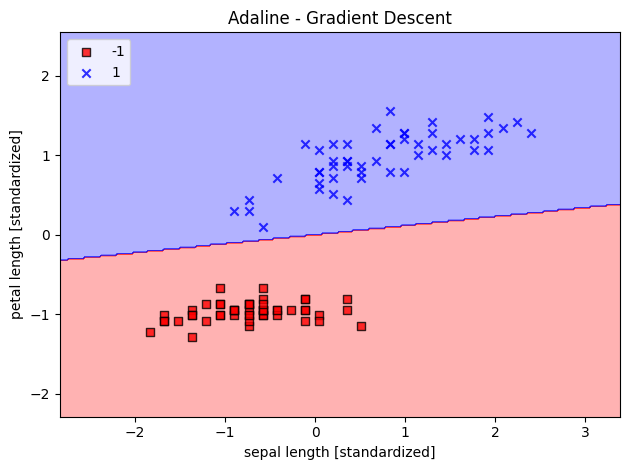

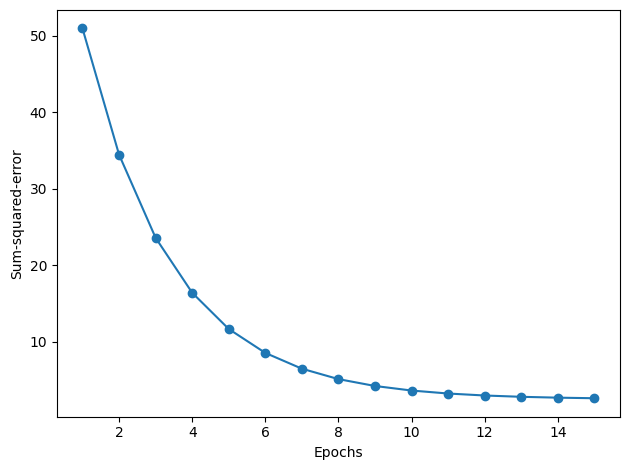

In [40]:
ada_gd = AdalineGD(eta=0.01, n_iter=15)
ada_gd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


plt.plot(range(1, len(ada_gd.cost_)+1), ada_gd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.tight_layout()
plt.show()

Gradiente Descendente Estocástico (Stochastic Gradient Descent)